In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Data.xlsx')
data = data[['Detection Date', 'Lab Status', 'Latitude', 'Longitude']]
data = data[data['Lab Status']=='Positive ID']
data.sort_values('Detection Date',inplace=True)
data.reset_index(drop=True,inplace=True)

In [3]:
data.columns

Index(['Detection Date', 'Lab Status', 'Latitude', 'Longitude'], dtype='object')

In [4]:
data

,Detection Date,Lab Status,Latitude,Longitude
0,2019-09-19 00:00:00,Positive ID,49.149394,-123.943134
1,2019-09-30 00:00:00,Positive ID,48.993892,-122.702242
2,2019-10-30 00:00:00,Positive ID,48.971949,-122.700941
3,2019-11-13 00:00:00,Positive ID,49.025831,-122.810653
4,2019-12-08 00:00:00,Positive ID,48.980994,-122.688503
5,2020-05-15 00:00:00,Positive ID,49.060215,-122.641648
6,2020-05-27 00:00:00,Positive ID,48.955587,-122.661037
7,2020-06-07 00:00:00,Positive ID,48.777534,-122.418612
8,2020-08-17 00:00:00,Positive ID,48.927519,-122.745016
9,2020-09-21 00:00:00,Positive ID,48.984269,-122.574809


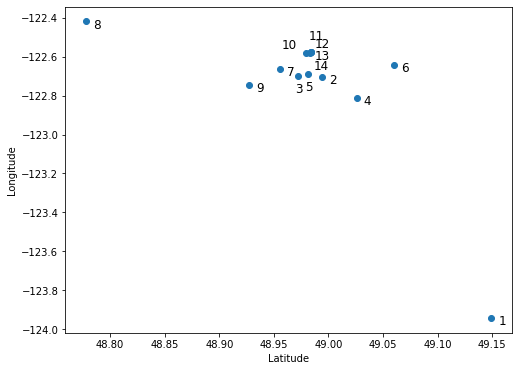

In [5]:
fig = plt.figure(figsize=(8,6))
plt.scatter(data['Latitude'],data['Longitude'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
i = 1
for a,b in zip(data['Latitude'],data['Longitude']):
    if i == 3:
        plt.text(a + 0.001, b - 0.1, i , ha='center', va= 'bottom',fontsize=12)
    if i == 5:
        plt.text(a + 0.001, b - 0.1, i , ha='center', va= 'bottom',fontsize=12)
    if i == 10:
        plt.text(a - 0.02, b, i , ha='center', va= 'bottom',fontsize=12)
    if i == 11:
        plt.text(a + 0.005, b + 0.05, i , ha='center', va= 'bottom',fontsize=12)
    if i == 12:
        plt.text(a + 0.01, b + 0.005, i , ha='center', va= 'bottom',fontsize=12)
    if i == 13:
        plt.text(a + 0.015, b - 0.05, i , ha='center', va= 'bottom',fontsize=12)
    if i == 14:
        plt.text(a + 0.01, b - 0.1, i , ha='center', va= 'bottom',fontsize=12)
    if i in [1,2,4,6,7,8,9]:
        plt.text(a + 0.01, b - 0.05, i , ha='center', va= 'bottom',fontsize=12)
    i += 1

In [6]:
mu_x = data['Latitude'].mean()
mu_y = data['Longitude'].mean()
sigma_x = data['Latitude'].std()
sigma_y = data['Longitude'].std()

In [7]:
X = data['Latitude']
Y = data['Longitude']

## 计算自相关函数

In [8]:
R = np.zeros([7,2])
for i in range(7):
    x1 = X[0:len(X)-i-1]
    x2 = X[i+1:len(X)]
    y1 = Y[0:len(Y)-i-1]
    y2 = Y[i+1:len(Y)]
    corx = np.cov(x1-mu_x,x2-mu_x)
    cory = np.cov(y1-mu_y,y2-mu_y)
    R[i,0] = corx[0,1] / sigma_x**2
    R[i,1] = cory[0,1] / sigma_y**2

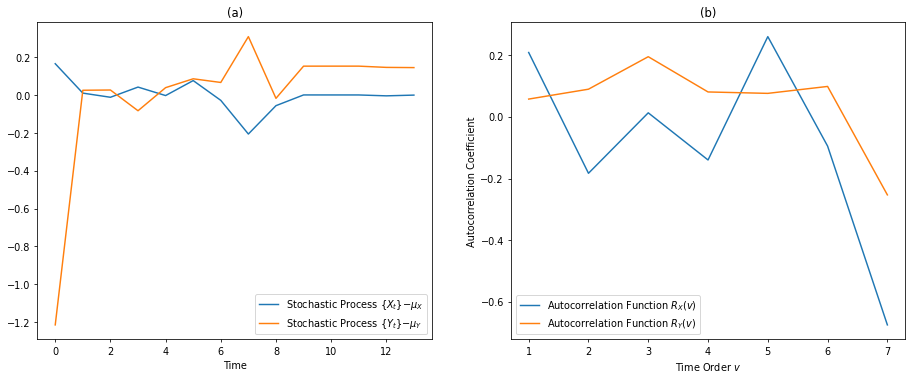

In [10]:
fig = plt.figure(figsize=(16,6),dpi=70)
fig.add_subplot(1,2,1)
plt.plot(X-mu_x,label='Stochastic Process {$X_t$}$-\mu_X$')
plt.plot(Y-mu_y,label='Stochastic Process {$Y_t$}$-\mu_Y$')
plt.xlabel('Time')
plt.title('(a)')
plt.legend()
fig.add_subplot(1,2,2)
plt.plot(np.arange(1,8), R[:,0],label='Autocorrelation Function $R_X(v)$')
plt.plot(np.arange(1,8), R[:,1],label='Autocorrelation Function $R_Y(v)$')
plt.xlabel('Time Order $v$')
plt.ylabel('Autocorrelation Coefficient')
plt.title('(b)')
plt.legend()

## 利用时间序列模型进行预测

In [11]:
# 划分训练集和验证集
x_val = X[10:14]
y_val = Y[10:14]
x_train = X[0:10]
y_train = Y[0:10]

In [12]:
x_pre = np.zeros([4,1])
y_pre = np.zeros([4,1])
x1 = X[9]
x2 = X[8]
y1 = Y[9]
y2 = Y[8]
# 预测所使用的回归系数是在Matlab里面求出来的
for i in range(4):
    x_temp = mu_x + 0.5122*(x1-mu_x) - 0.4466*(x2-mu_x) + 3.8234*10**(-4)
    y_temp = mu_y + 0.8821*(y1-mu_y) - 0.4526*(y2-mu_y) 
    x_pre[i] = x_temp
    y_pre[i] = y_temp
    x2 = x1
    y2 = y1
    x1 = x_temp
    y1 = y_temp

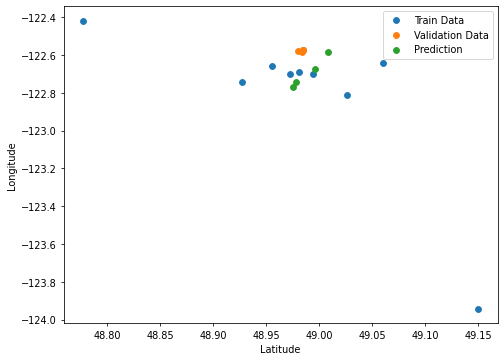

In [13]:
fig = plt.figure(figsize=(8,6),dpi=70)
plt.scatter(x_train,y_train,label='Train Data')
plt.scatter(x_val,y_val,label='Validation Data')
plt.scatter(x_pre,y_pre,label='Prediction')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
# plt.xlim(min(X),max(X))
# plt.ylim(min(Y),max(Y))
plt.legend()